In [4]:
import requests
import pandas as pd

def get_go_terms(uniprot_ids):
    url = "https://www.ebi.ac.uk/proteins/api/proteins"
    headers = {
        "Accept": "application/json"
    }
    
    go_data = []

    for uniprot_id in uniprot_ids:
        response = requests.get(f"{url}/{uniprot_id}", headers=headers)
        if response.status_code == 200:
            protein_data = response.json()
            go_terms = protein_data.get("dbReferences", [])
            for go_term in go_terms:
                if go_term['type'] == 'GO':
                    go_data.append({
                        'UniProt ID': uniprot_id,
                        'GO ID': go_term['id'],
                        'GO Term': go_term['properties'].get('term', 'N/A')
                    })
        else:
            print(f"Failed to retrieve data for UniProt ID: {uniprot_id}")

    return pd.DataFrame(go_data)

# Replace with your list of UniProt IDs
gwas_df = pd.read_csv("/Users/davidthomas/Desktop/Mutation_database_checker/Determining_interesting_mutations/variants_50k_with_genes.csv")
uniprot_ids = gwas_df["UniProt_ID"].unique()
go_terms_df = get_go_terms(uniprot_ids)

# Print or save the resulting DataFrame
print(go_terms_df)
# go_terms_df.to_csv("go_terms.csv", index=False)


Failed to retrieve data for UniProt ID: nan
    UniProt ID       GO ID                                            GO Term
0       P9WGY9  GO:0005829                                          C:cytosol
1       P9WGY9  GO:0000428              C:DNA-directed RNA polymerase complex
2       P9WGY9  GO:0009274                    C:peptidoglycan-based cell wall
3       P9WGY9  GO:0005886                                  C:plasma membrane
4       P9WGY9  GO:0003677                                      F:DNA binding
..         ...         ...                                                ...
371     Q6MX01  GO:0047134    F:protein-disulfide reductase (NAD(P)) activity
372     Q6MX01  GO:0045454                           P:cell redox homeostasis
373     Q6MX01  GO:0045892  P:negative regulation of DNA-templated transcr...
374     Q6MX01  GO:0046677                           P:response to antibiotic
375     Q6MX01  GO:0070542                           P:response to fatty acid

[376 rows x 3 colum

In [14]:
# look into GO terms and see how many contain antibiotic
go_terms_df['GO Term'].str.contains('antibiotic').sum()

# print the rows containting antibiotic
# print(go_terms_df[go_terms_df['GO Term'].str.contains('antibiotic')])

# print the rows containting C:
print(go_terms_df[go_terms_df['GO Term'].str.contains('C:')].head(50))

    UniProt ID       GO ID                                            GO Term
0       P9WGY9  GO:0005829                                          C:cytosol
1       P9WGY9  GO:0000428              C:DNA-directed RNA polymerase complex
2       P9WGY9  GO:0009274                    C:peptidoglycan-based cell wall
3       P9WGY9  GO:0005886                                  C:plasma membrane
9       P9WH63  GO:0005840                                         C:ribosome
10      P9WH63  GO:0015935                          C:small ribosomal subunit
16      P9WIE5  GO:0005829                                          C:cytosol
17      P9WIE5  GO:0005576                             C:extracellular region
18      P9WIE5  GO:0009274                    C:peptidoglycan-based cell wall
19      P9WIE5  GO:0005886                                  C:plasma membrane
46      P9WNL9  GO:0005829                                          C:cytosol
47      P9WNL9  GO:0005886                                  C:pl

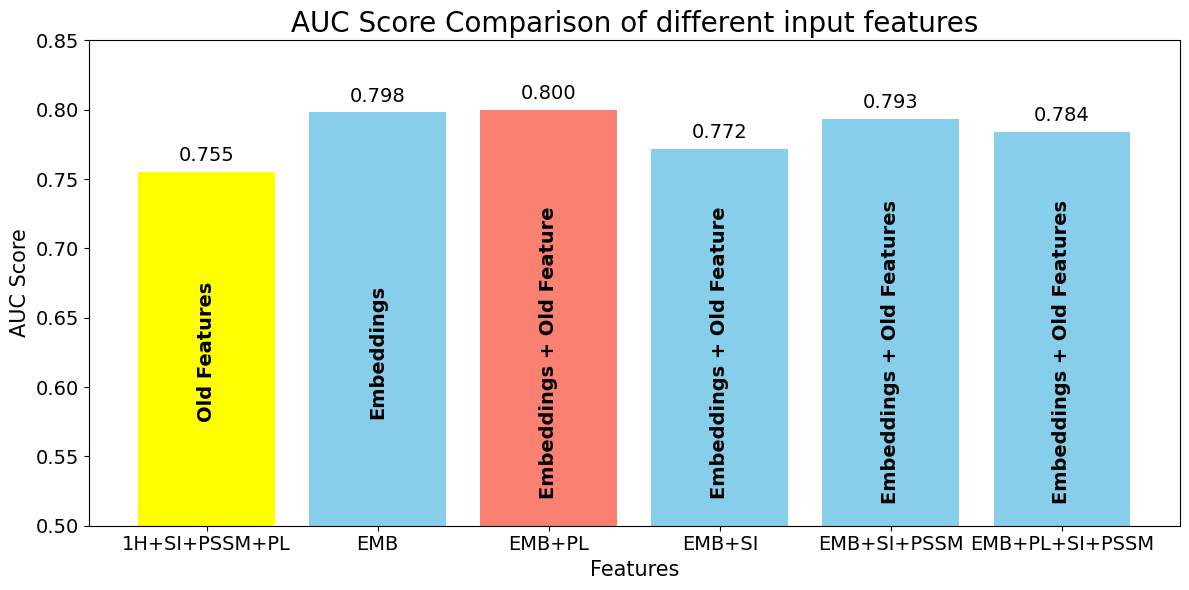

In [112]:
import matplotlib.pyplot as plt

# Data from Table 1
features = [
    '1H+SI+PSSM+PL', 'EMB', 'EMB+PL', 
    'EMB+SI', 'EMB+SI+PSSM', 'EMB+PL+SI+PSSM'
]
auc_scores = [0.755, 0.798, 0.800, 0.772, 0.793, 0.784]

# Create bar chart
plt.figure(figsize=(12, 6))
colors = ['skyblue' if feature != 'EMB+PL' else 'salmon' for feature in features]
colors[0] = 'yellow'
bars = plt.bar(features, auc_scores, color=colors)

# Add value labels and custom text on the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.3f}' , ha='center', va='bottom', fontsize=14)
    if i == 0:
        plt.text(bar.get_x() + bar.get_width()/2, 0.625, 'Old Features', ha='center', va='center', fontsize=14, color='black', weight='bold', rotation=90)
    elif i == 1:
        plt.text(bar.get_x() + bar.get_width()/2, 0.625, 'Embeddings', ha='center', va='center', fontsize=14, color='black', weight='bold', rotation=90)
    elif i == 2 or i == 3:
        plt.text(bar.get_x() + bar.get_width()/2, 0.625, 'Embeddings + Old Feature', ha='center', va='center', fontsize=14, color='black', weight='bold', rotation=90)
    else:
        plt.text(bar.get_x() + bar.get_width()/2, 0.625, 'Embeddings + Old Features', ha='center', va='center', fontsize=14, color='black', weight='bold', rotation=90)

plt.ylim(0.5, 0.85)
plt.xlabel('Features', fontsize=15)
plt.ylabel('AUC Score', fontsize=15)
plt.title('AUC Score Comparison of different input features', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()


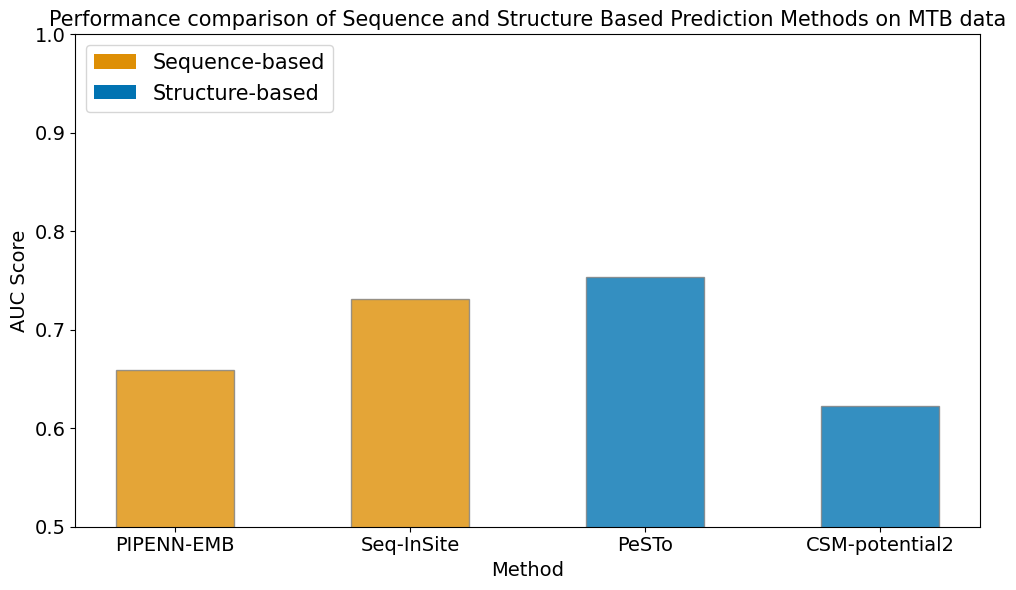

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# AUC scores from the table
methods = ['PIPENN-EMB', 'Seq-InSite', 'PeSTo', 'CSM-potential2']
auc_scores = [0.659, 0.731, 0.754, 0.623]

# Sequence-based and structure-based methods
seq_based = ['PIPENN-EMB', 'Seq-InSite']
struct_based = ['PeSTo', 'CSM-Potential2']

# Seaborn color palette
sns_palette = sns.color_palette("colorblind")
colors = {
    'seq': sns_palette[1],  # second color in the palette (orange)
    'struct': sns_palette[0]  # first color in the palette (blue)
}

# Plot settings
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5
opacity = 0.8

# Determine colors for each method
bar_colors = [colors['seq'] if method in seq_based else colors['struct'] for method in methods]

# Plot the bars
index = np.arange(len(methods))
bars = ax.bar(index, auc_scores, bar_width, alpha=opacity, color=bar_colors, edgecolor='grey')

# Add labels and title
ax.set_xlabel('Method', fontsize=14)
ax.set_ylabel('AUC Score', fontsize=14)
ax.set_title('Performance comparison of Sequence and Structure Based Prediction Methods on MTB data', fontsize=15)
ax.set_xticks(index)
ax.set_xticklabels(methods, fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set y-axis limits
ax.set_ylim(0.5, 1)

# Add legend
seq_patch = plt.Rectangle((0, 0), 1, 1, fc=colors['seq'], edgecolor='none')
struct_patch = plt.Rectangle((0, 0), 1, 1, fc=colors['struct'], edgecolor='none')
ax.legend([seq_patch, struct_patch], ['Sequence-based', 'Structure-based'], loc='upper left', fontsize=15)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


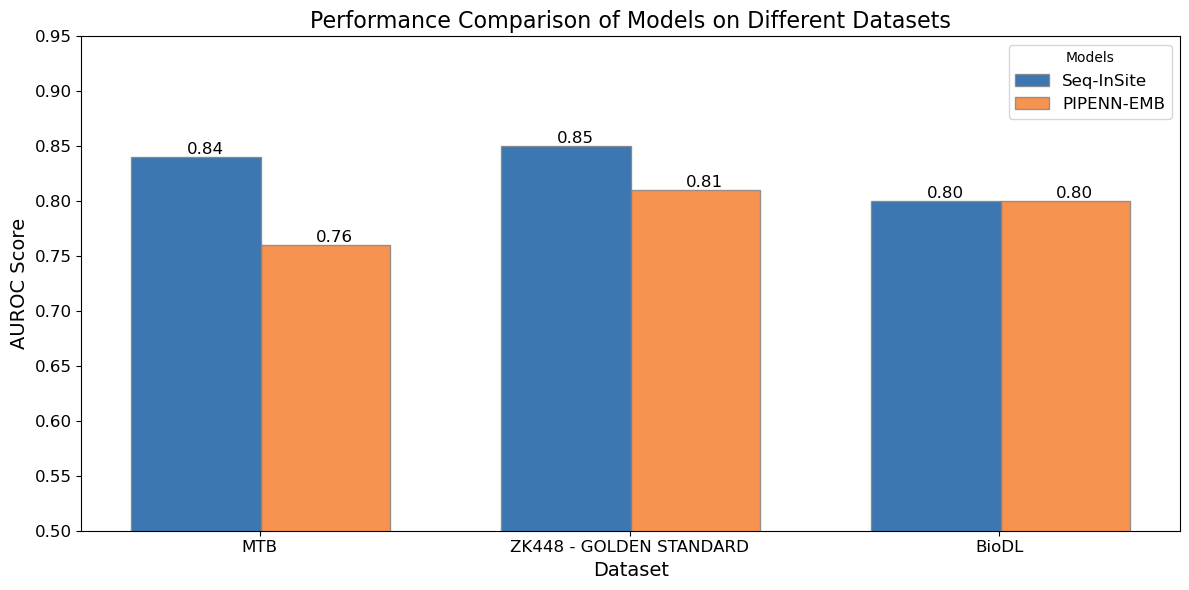

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# AUROC scores from the table
datasets = ['MTB', 'ZK448 - GOLDEN STANDARD', 'BioDL']
models = ['Seq-InSite', 'PIPENN-EMB']
auroc_scores = [
    [0.84, 0.76],  # MTB
    [0.85, 0.81],  # ZK448
    [0.80, 0.80]   # BioDL
]

# Define colors for Seq-InSite and PIPENN-EMB using seaborn color palette
seq_insite_color = sns.color_palette("Blues")[5]  # blue
pipenn_color = sns.color_palette("Oranges")[3]  # orange
colors = [seq_insite_color, pipenn_color]

# Plot settings
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
opacity = 0.8

# Create index for groups
index = np.arange(len(datasets))

# Plot the bars for Seq-InSite and PIPENN-EMB for each dataset
for i in range(len(models)):
    bar_positions = index + i * bar_width + 0.15
    ax.bar(bar_positions, [score[i] for score in auroc_scores], bar_width, 
           alpha=opacity, color=colors[i], edgecolor='grey', label=models[i])

# Add labels and title
ax.set_xlabel('Dataset', fontsize=14)
ax.set_ylabel('AUROC Score', fontsize=14)
ax.set_title('Performance Comparison of Models on Different Datasets', fontsize=16)
ax.set_xticks(index + bar_width - 0.028)
ax.set_xticklabels(datasets, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set y-axis limits
ax.set_ylim(0.5, 0.95)

# Add scores above bars
for i in range(len(models)):
    for j in range(len(datasets)):
        height = auroc_scores[j][i]
        ax.text(j + i * bar_width + bar_width / 2, height, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=12)

# Add legend
ax.legend(fontsize=12, title="Models")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
